<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS7: Estimación Espectral
#### Eloy Silva

### Configuración e inicio de la simulación

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

### Lectura de Electrocardiograma (ECG). Estimación de espectro mediante Periodograma y método Welch.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

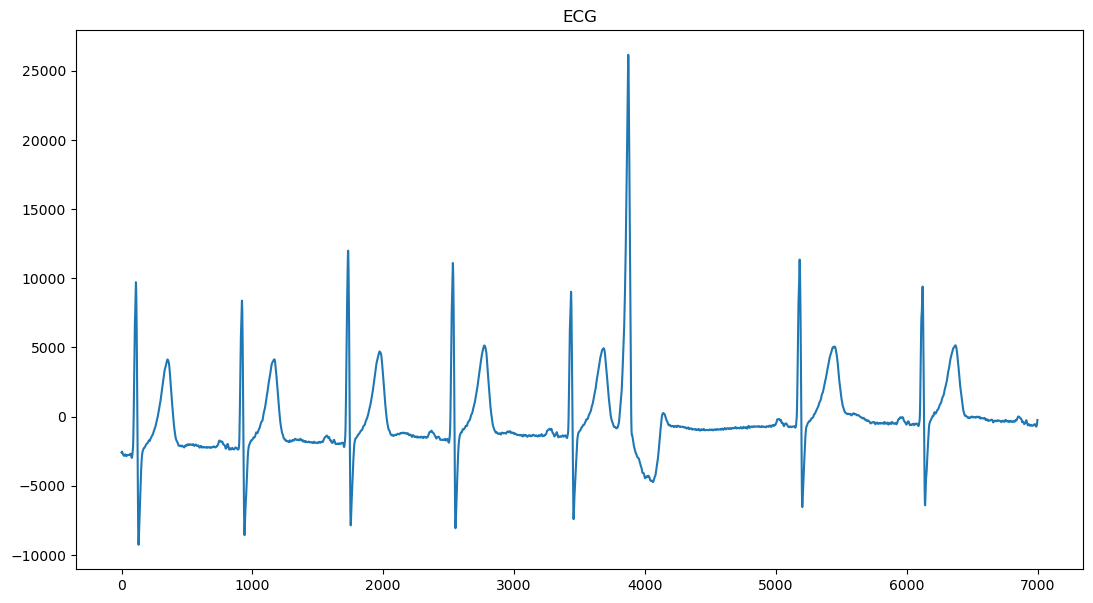

In [17]:
fs = 1000 # Hz
mat_struct = sio.loadmat('ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

plt.figure()
plt.plot(ecg_one_lead[5000:12000])
plt.title('ECG')

spectrum = np.fft.fft(ecg_one_lead, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = np.abs(spectrum)**2                                       #Calculo de periodograma
freq, welch = sp.signal.welch(ecg_one_lead, fs=fs, nperseg=N/5, axis=0) #Estimación de espectro con método de Welch

# Find the peak power value
Bw_amplitude = np.max(welch)/2
# Find the frequencies where the power is greater than the threshold
significant_frequencies = freq[welch >= Bw_amplitude]
# Bandwidth estimation
bandwidth = significant_frequencies[-1] - significant_frequencies[0]

print(f"3 dB Bandwidth: {bandwidth} Hz")

plt.figure()
plt.semilogy(f[:N//2], periodogram[:N//2], label="Periodograma")
plt.semilogy(freq, welch, label="Welch")
plt.title('Estimación de Módulo')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Lectura de Pletismografía (PPG). Estimación de espectro mediante Periodograma y método Welch.

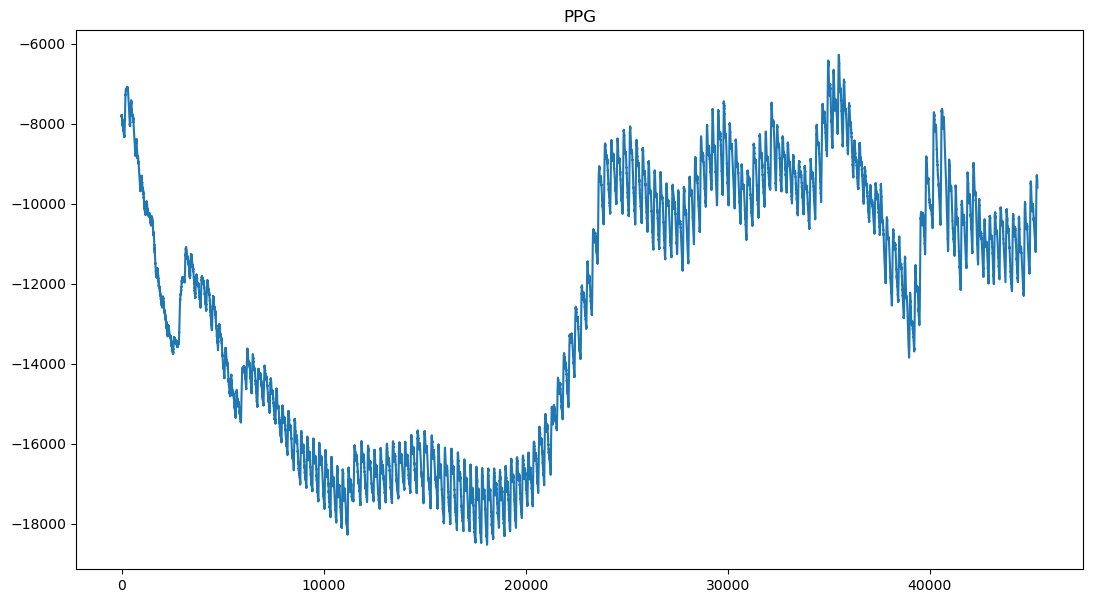

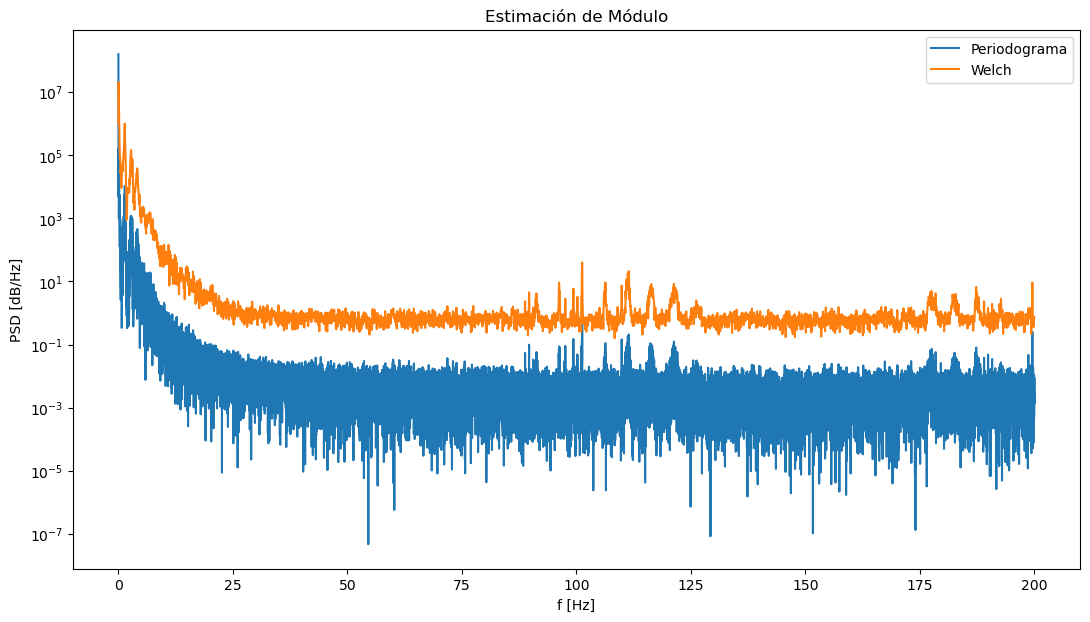

In [12]:
fs = 400 # Hz
ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe
N = len(ppg)

plt.figure()
plt.plot(ppg)
plt.title('PPG')

spectrum = np.fft.fft(ppg, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = np.abs(spectrum)**2
freq, welch = sp.signal.welch(ppg, fs=fs, nperseg=N/5, axis=0)

plt.figure();
plt.semilogy(f[:N//2], periodogram[:N//2], label="Periodograma")
plt.semilogy(freq, welch, label="Welch")
plt.title('Estimación de Módulo')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Lectura de archivo de audio (WAV). Estimación de espectro mediante Periodograma y método Welch.

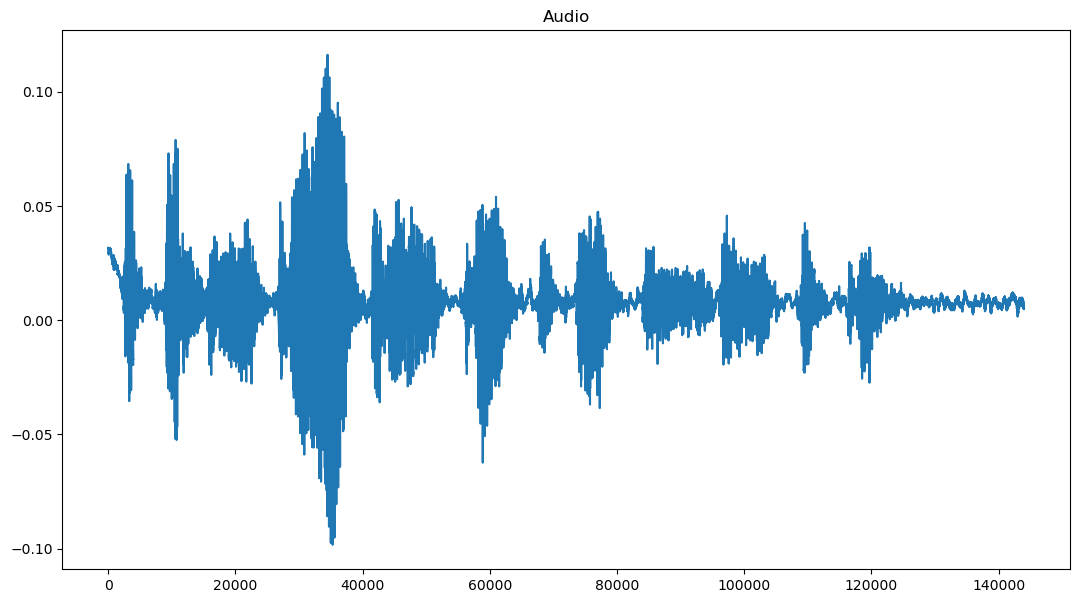

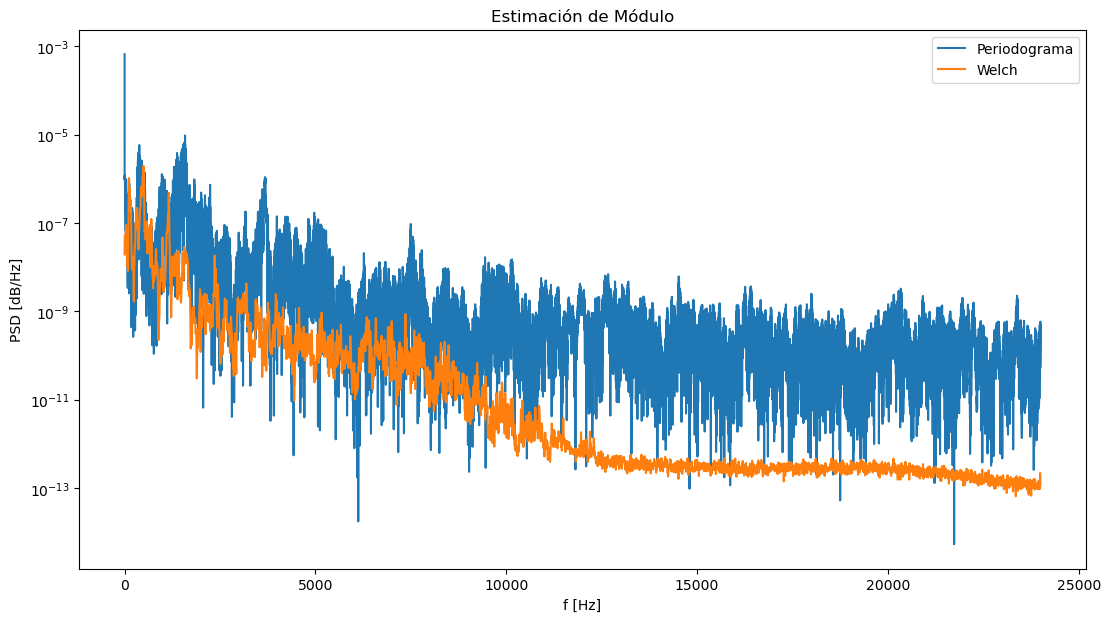

In [13]:
fs, wav_data = sio.wavfile.read('prueba psd.wav')

plt.figure()
plt.plot(wav_data)
plt.title('Audio')

spectrum = np.fft.fft(wav_data, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = np.abs(spectrum)**2
freq, welch = sp.signal.welch(wav_data, fs=fs, nperseg=N/5, axis=0)

plt.figure();
plt.semilogy(f[:N//2], periodogram[:N//2], label="Periodograma")
plt.semilogy(freq, welch, label="Welch")
plt.title('Estimación de Módulo')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Se observa que tanto el periodograma como el método de Welch dan un resultado similar, compartiendo la forma pero difiriendo en un factor de escala.